In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from polygraphs.analysis import Processor

In [3]:
class BeliefProcessor(Processor):
    def __init__(self, path):
        super().__init__(path)
        # Add the columns when processor is initialized
        self.add(self.mean(0.5, 0.75, 0.9, 0.99), self.quantile(0.5, 0.75, 0.9, 0.99, quantiles=(0.25,)))

    def mean(self, *thresholds):
        """Calculate when mean beliefs first met a threshold and count crossings."""
        def get_mean_with_recrossings(iterations, threshold=0.5):
            mean_iteration = iterations.groupby("iteration").mean()
            above_threshold = mean_iteration["beliefs"] > threshold
            crossings = ((above_threshold & ~above_threshold.shift(fill_value=False)) |
                         (~above_threshold & above_threshold.shift(fill_value=False))).sum()
            first_crossing = mean_iteration[above_threshold].index[0] if above_threshold.any() else None
            return first_crossing, crossings
        
        for threshold in thresholds:
            threshold = float(threshold)
            if 0 <= threshold <= 1:
                first_crossing_list = []
                crossing_count_list = []
                for belief in self.beliefs:
                    first_crossing, crossing_count = get_mean_with_recrossings(belief, threshold)
                    first_crossing_list.append(first_crossing)
                    crossing_count_list.append(crossing_count)
                column = f"mean_{str(threshold).replace('.', '_')}"
                crossing_column = column + "_crossings"
                self.dataframe[column] = first_crossing_list
                self.dataframe[crossing_column] = crossing_count_list

    def quantile(self, *thresholds, quantiles=(0.25,)):
        """Calculate when quantile beliefs first met a threshold and count crossings."""
        def get_quantile(iterations, threshold, quantile_level):
            quantile_iteration = iterations.groupby("iteration").quantile(quantile_level)
            above_threshold = quantile_iteration['beliefs'] > threshold
            count_crossings = ((above_threshold & ~above_threshold.shift(fill_value=False)) |
                               (~above_threshold & above_threshold.shift(fill_value=False))).sum()
            iterations_above_threshold = quantile_iteration[quantile_iteration['beliefs'] > threshold]
            return iterations_above_threshold.index[0] if len(iterations_above_threshold) > 0 else None, count_crossings

        for threshold in thresholds:
            threshold = float(threshold)
            if 0 <= threshold <= 1:
                for quantile_level in quantiles:
                    if 0 <= quantile_level <= 1:
                        quantile_list = []
                        crossings_list = []
                        for belief in self.beliefs:
                            first_crossing, crossing_count = get_quantile(belief, threshold, quantile_level)
                            quantile_list.append(first_crossing)
                            crossings_list.append(crossing_count)
                        column = f"quantile_{str(threshold).replace('.', '_')}_q{int(quantile_level * 100)}"
                        crossing_column = column + "_crossings"
                        self.dataframe[column] = quantile_list
                        self.dataframe[crossing_column] = crossings_list

    def aggregate_crossings_by_op(self):
        """Aggregate threshold crossings by operator."""
        aggregated = self.dataframe.copy()
        numeric_data = aggregated.select_dtypes(include=["number"])
        numeric_data["op"] = aggregated["op"]
        return numeric_data.groupby("op").sum()

In [4]:
# Initialize processor
x = BeliefProcessor("~/polygraphs-cache/results/")
x.get()

,trials,network_kind,op,epsilon,steps,duration,action,undefined,converged,polarized,...,mean_0_99,mean_0_99_crossings,quantile_0_5_q25,quantile_0_5_q25_crossings,quantile_0_75_q25,quantile_0_75_q25_crossings,quantile_0_9_q25,quantile_0_9_q25_crossings,quantile_0_99_q25,quantile_0_99_q25_crossings
0,64,gml,BalaGoyalOp,0.001,25000,2058.491447,?,False,False,False,...,12500.0,1,500,1,900,1,1400,1,2600,1
1,64,gml,BalaGoyalOp,0.001,25000,2061.799474,?,False,False,False,...,12600.0,1,600,1,1000,1,1800,1,2700,1
2,64,gml,BalaGoyalOp,0.001,25000,2051.364627,?,False,False,False,...,13700.0,3,500,1,900,1,1500,1,2700,1
3,64,gml,UnreliableNetworkModifiedAlignedNegativeEpsOp,0.001,25000,5339.474766,?,False,False,False,...,NaN,0,2200,1,5000,1,6400,1,12900,1
4,64,gml,UnreliableNetworkModifiedAlignedNegativeEpsOp,0.001,25000,5441.242231,?,False,False,False,...,NaN,0,1800,1,3400,1,5000,1,8800,1
5,64,gml,UnreliableNetworkModifiedAlignedNegativeEpsOp,0.001,25000,5462.158197,?,False,False,False,...,NaN,0,1900,1,3800,1,5700,1,9900,1
6,64,gml,UnreliableNetworkModifiedAlignedNegativeEpsOp,0.001,25000,5139.118561,?,False,False,False,...,NaN,0,3200,1,5300,3,8300,1,12400,1
7,64,gml,UnreliableNetworkModifiedAlignedNegativeEpsOp,0.001,25000,5002.808680,?,False,False,False,...,NaN,0,2100,1,3900,1,6200,1,10500,1
8,64,gml,BalaGoyalOp,0.001,25000,2268.533357,?,False,False,False,...,12800.0,1,400,1,800,1,1300,1,2400,1
9,64,gml,BalaGoyalOp,0.001,25000,2285.084374,?,False,False,False,...,12800.0,1,500,1,1000,1,1500,1,2600,1


In [ ]:
# Define metrics to analyze
metrics = [
    "mean_0_5", "mean_0_75", "mean_0_9", "mean_0_99",
    "quantile_0_5_q25", "quantile_0_75_q25", "quantile_0_9_q25", "quantile_0_99_q25"
]

# Get unique operators
operators = x.dataframe["op"].unique()

## Distribution of First Steps for operators

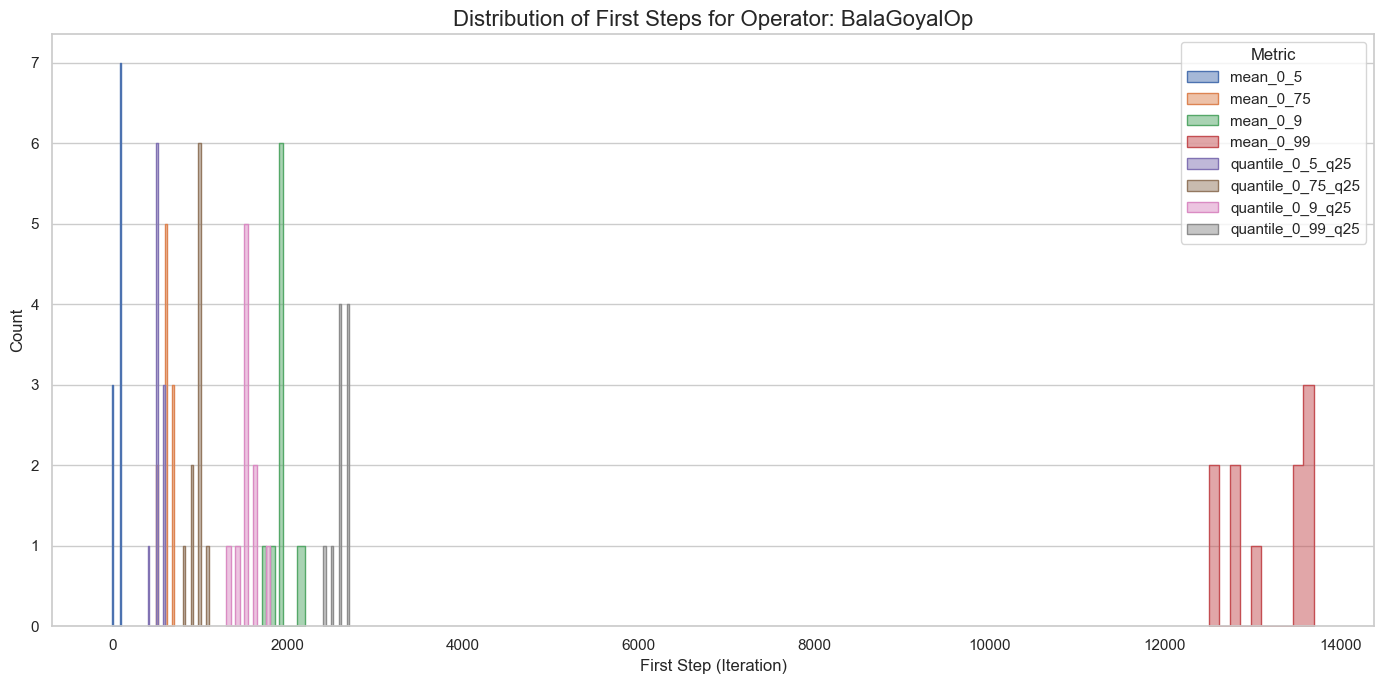

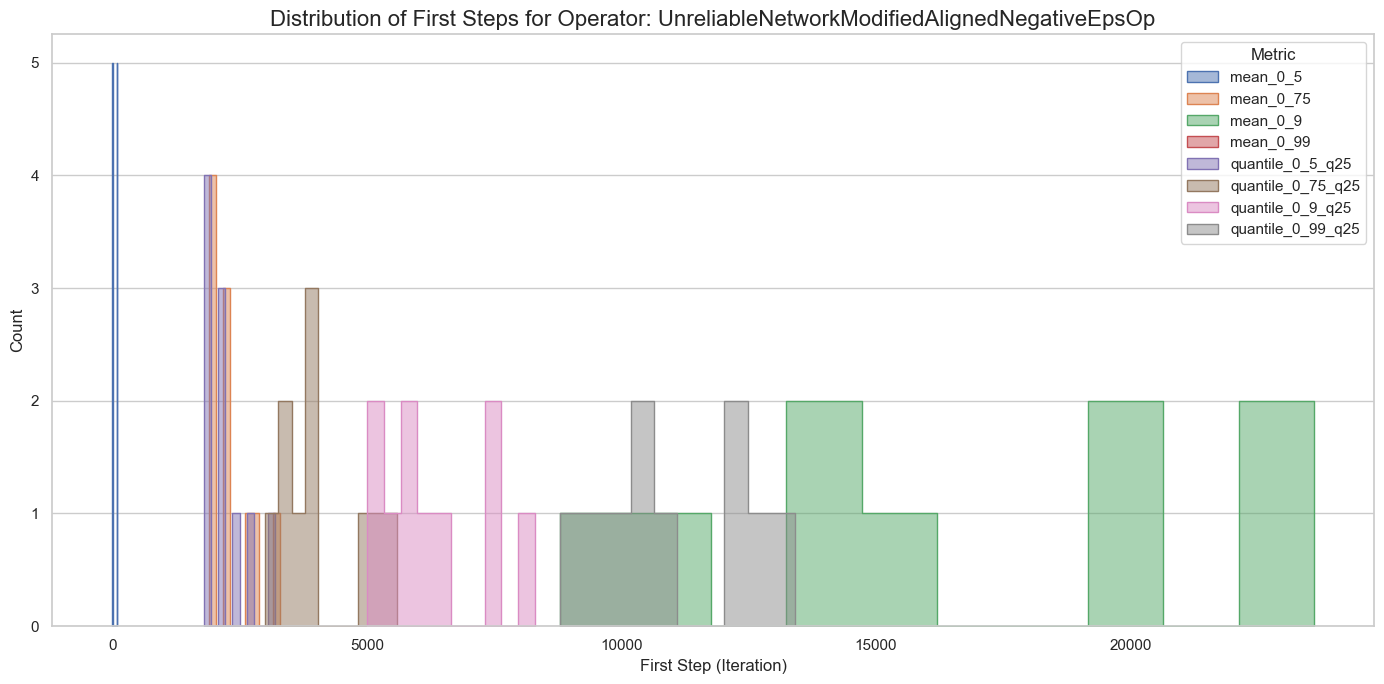

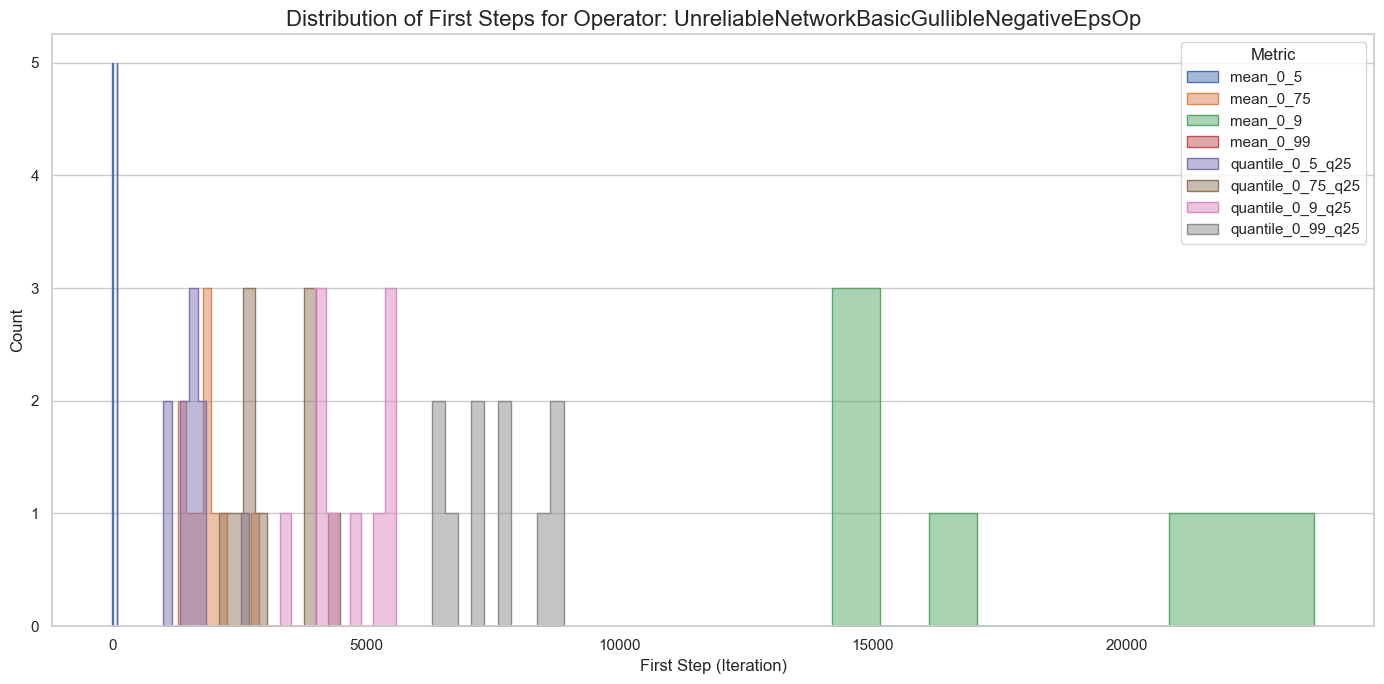

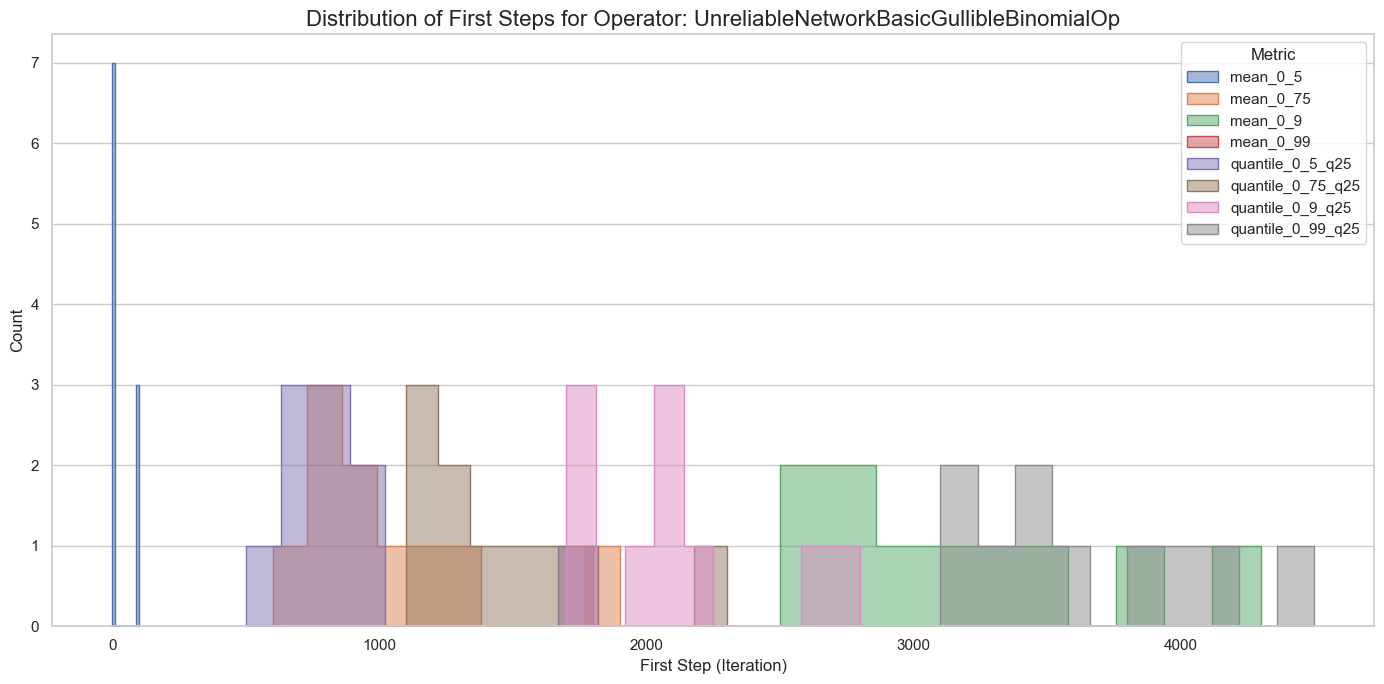

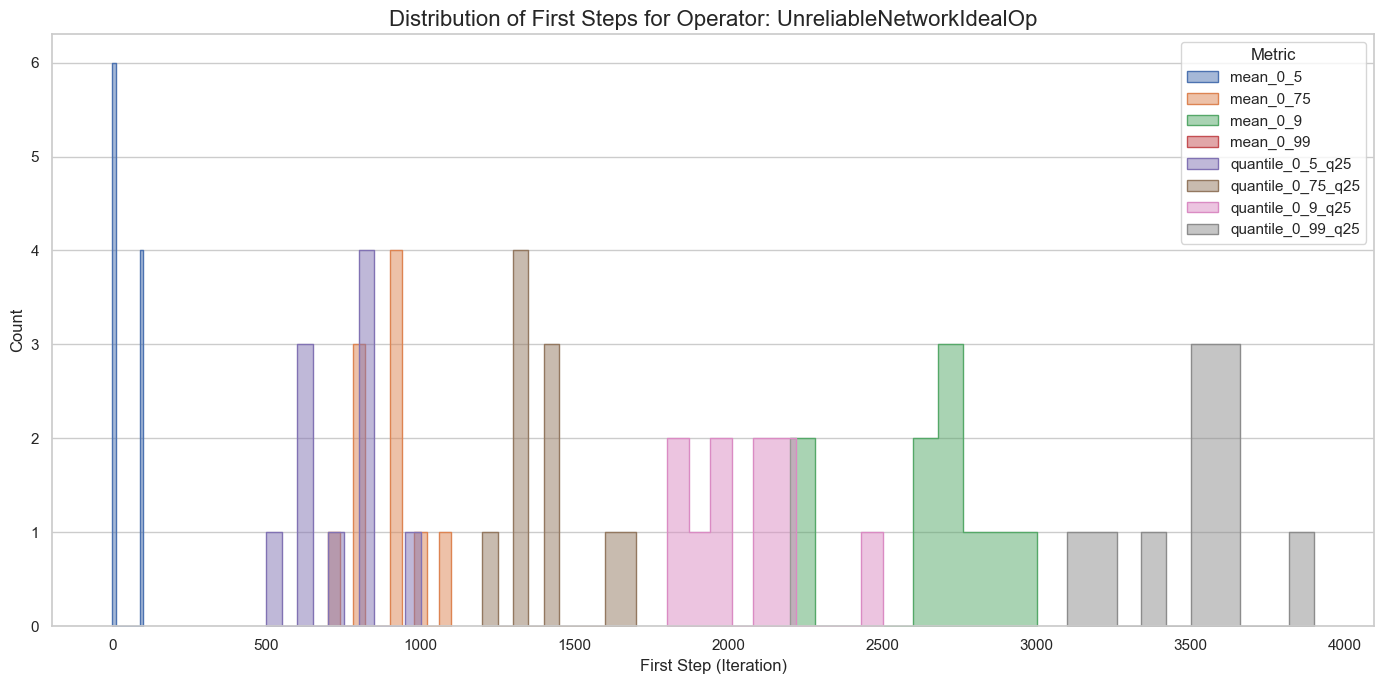

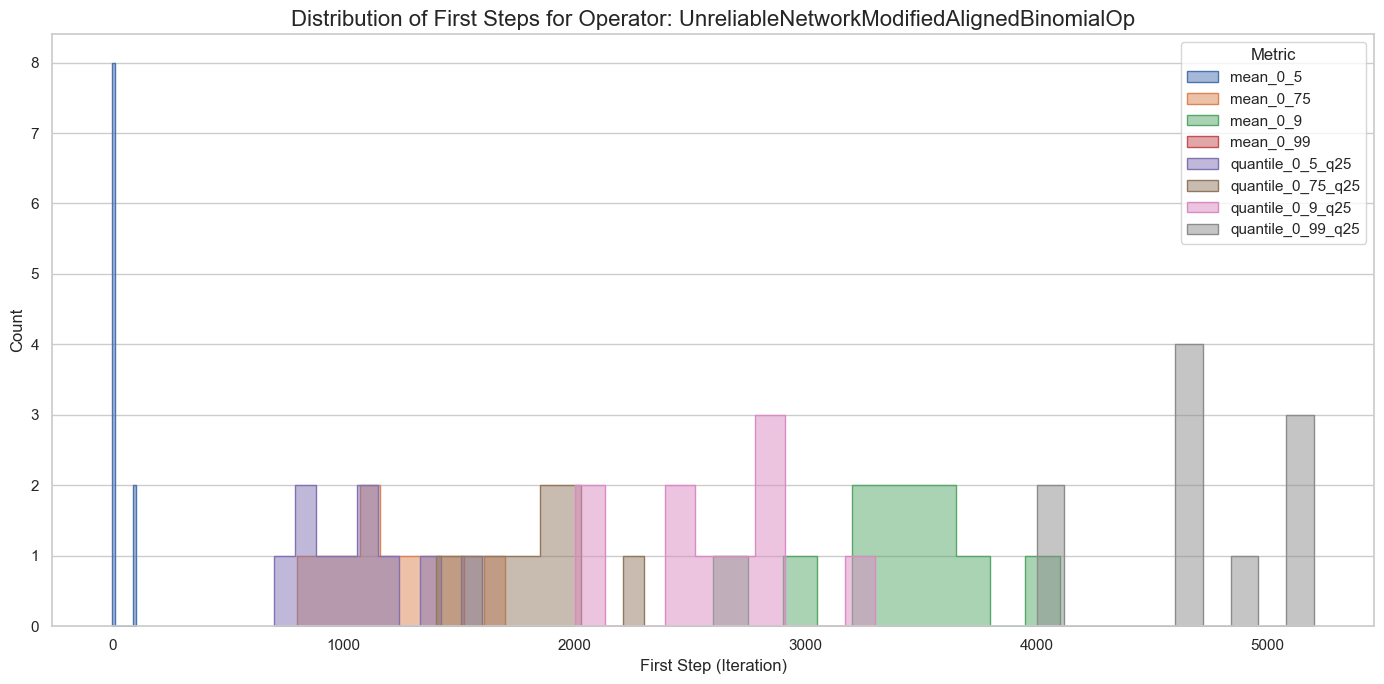

In [26]:
# (a) Distribution of First Steps for Each Metric by Operator
for op in operators:
    op_data = x.dataframe[x.dataframe["op"] == op]
    plt.figure(figsize=(14, 7))
    for metric in metrics:
        sns.histplot(data=op_data, x=metric, label=metric, bins=10, alpha=0.5, element="step")
    plt.title(f"Distribution of First Steps for Operator: {op}", fontsize=16)
    plt.xlabel("First Step (Iteration)", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Metric")
    plt.grid(axis='x', visible=False) 
    plt.tight_layout()
    plt.savefig(f"images/first_steps_distribution_{op}.png", format="png", dpi=600, bbox_inches="tight")
    plt.savefig(f"images/first_steps_distribution_{op}.svg", format="svg", bbox_inches="tight")
    plt.show()

## Average number of threshold crossings per simulation by metric and operator

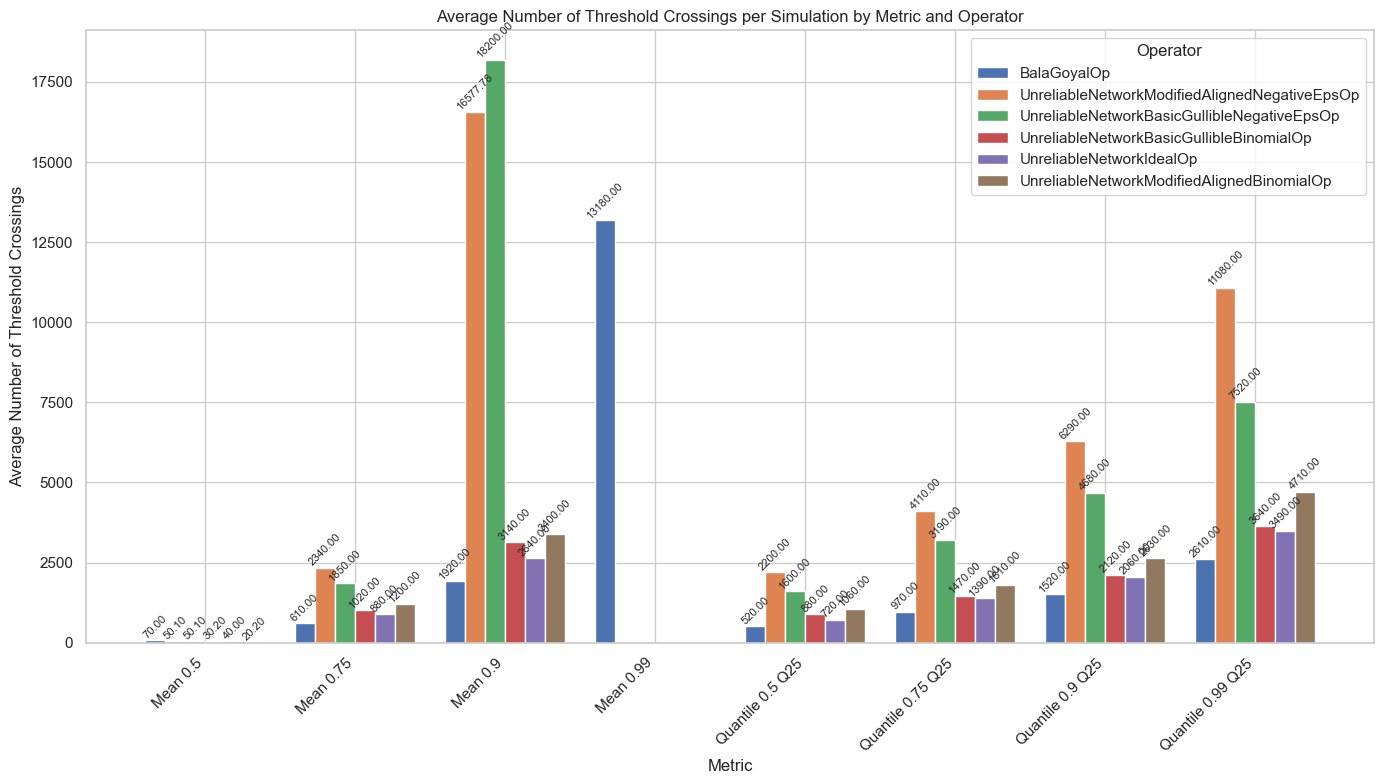

In [25]:
import numpy as np

# (b) Average number of threshold crossings PER SIM for each metric
plt.figure(figsize=(14, 8))

# For each operator, compute the average crossings per metric
for i, operator in enumerate(operators):
    op_data =  x.dataframe[x.dataframe["op"] == operator]
    
    # Calculate the mean of each crossing column
    avg_crossings = op_data[metrics].mean().reset_index()
    avg_crossings.columns = ['Metric', 'Average Crossings']
    
    # Clean up metric names
    avg_crossings['Metric'] = avg_crossings['Metric'].apply(
        lambda x: x.replace('_crossings', '').replace('_', ' ').title().replace(' 0 ', ' 0.')
    )
    
    # Create a position offset for each operator's bars
    x_pos = np.arange(len(avg_crossings))
    width = 0.8 / len(operators)
    offset = width * i - (len(operators) - 1) * width / 2
    
    plt.bar(x_pos + offset, avg_crossings['Average Crossings'], width=width, label=operator)
    
    # Add value labels on top of each bar
    for j, val in enumerate(avg_crossings['Average Crossings']):
        plt.text(x_pos[j] + offset, val + 0.1, f'{val:.2f}', 
                 ha='center', va='bottom', fontsize=8, rotation=45)

plt.xlabel('Metric')
plt.ylabel('Average Number of Threshold Crossings')
plt.title('Average Number of Threshold Crossings per Simulation by Metric and Operator')
plt.xticks(np.arange(len(metrics)), 
           [col.replace('_crossings', '').replace('_', ' ').title().replace(' 0 ', ' 0.') 
            for col in metrics], 
           rotation=45, ha='right')
plt.legend(title='Operator')
plt.tight_layout()
plt.savefig("images/avg_crossings_per_sim_by_metric_and_op.png", format="png", dpi=300, bbox_inches="tight")
plt.savefig("images/avg_crossings_per_sim_by_metric_and_op.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close()

## Distribution of threshold crossings per simulation for operators

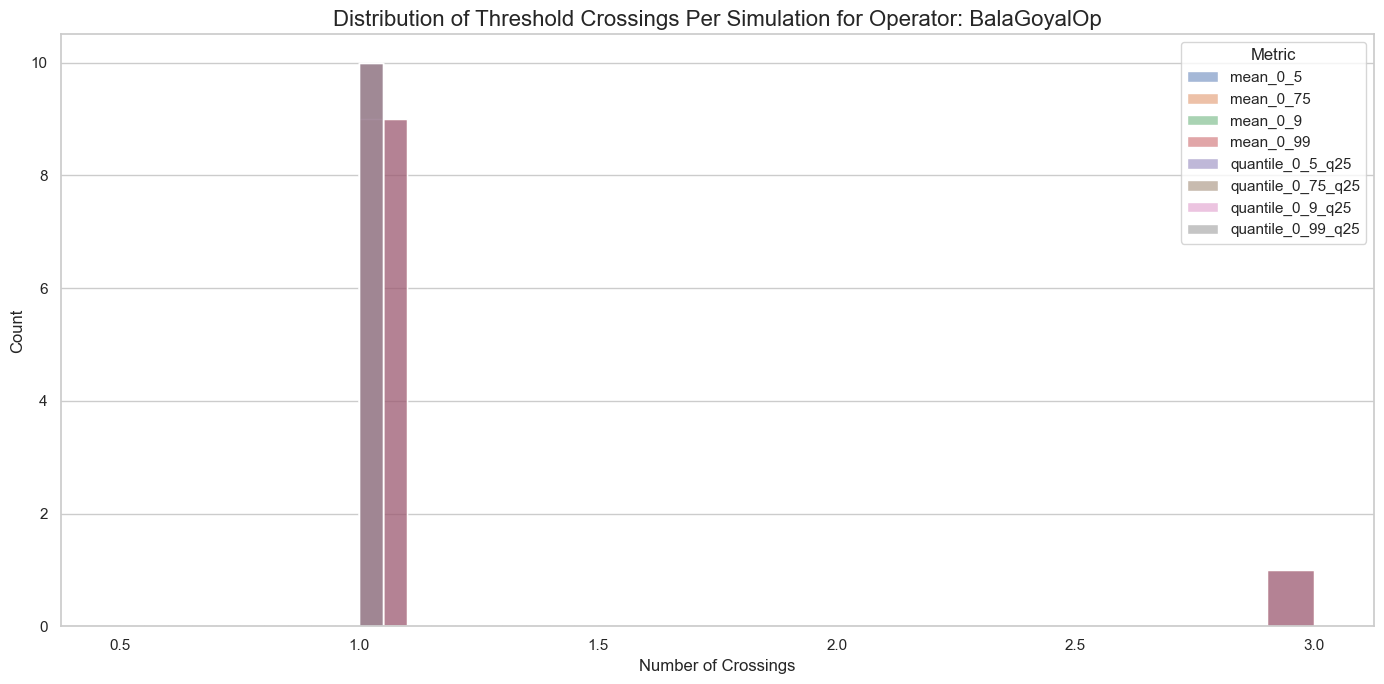

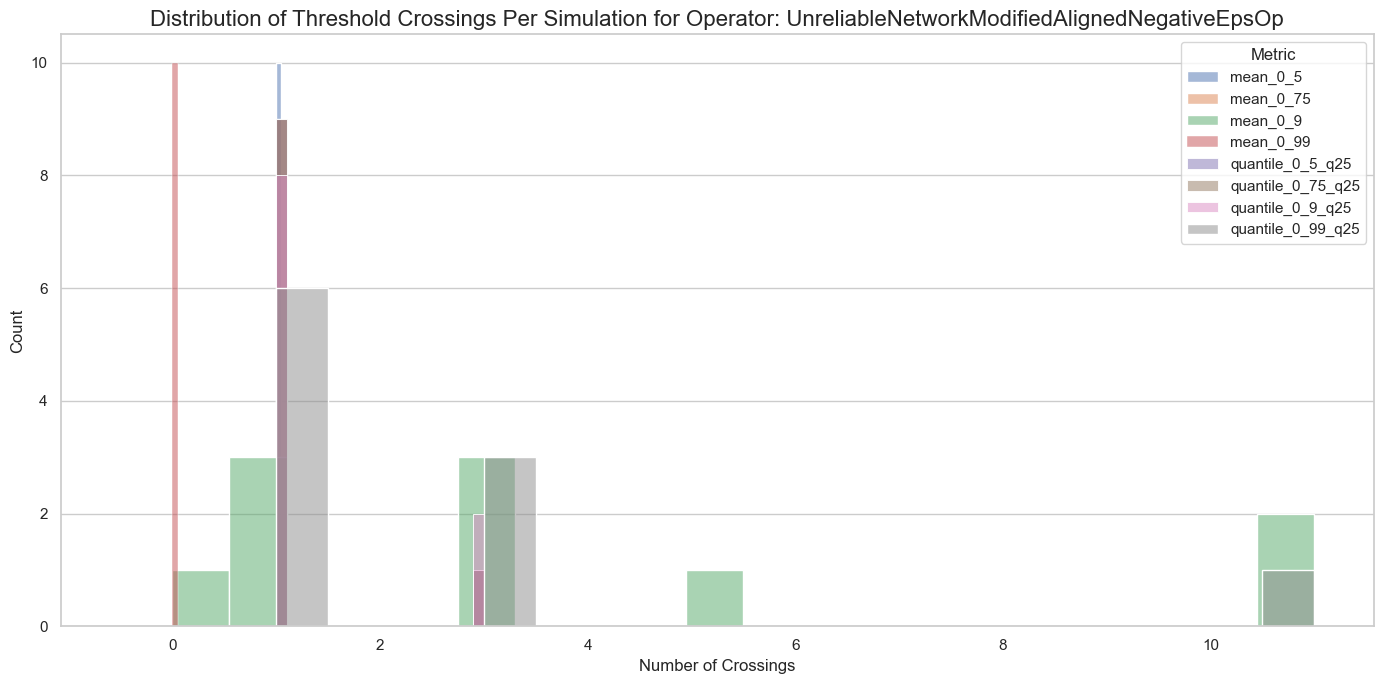

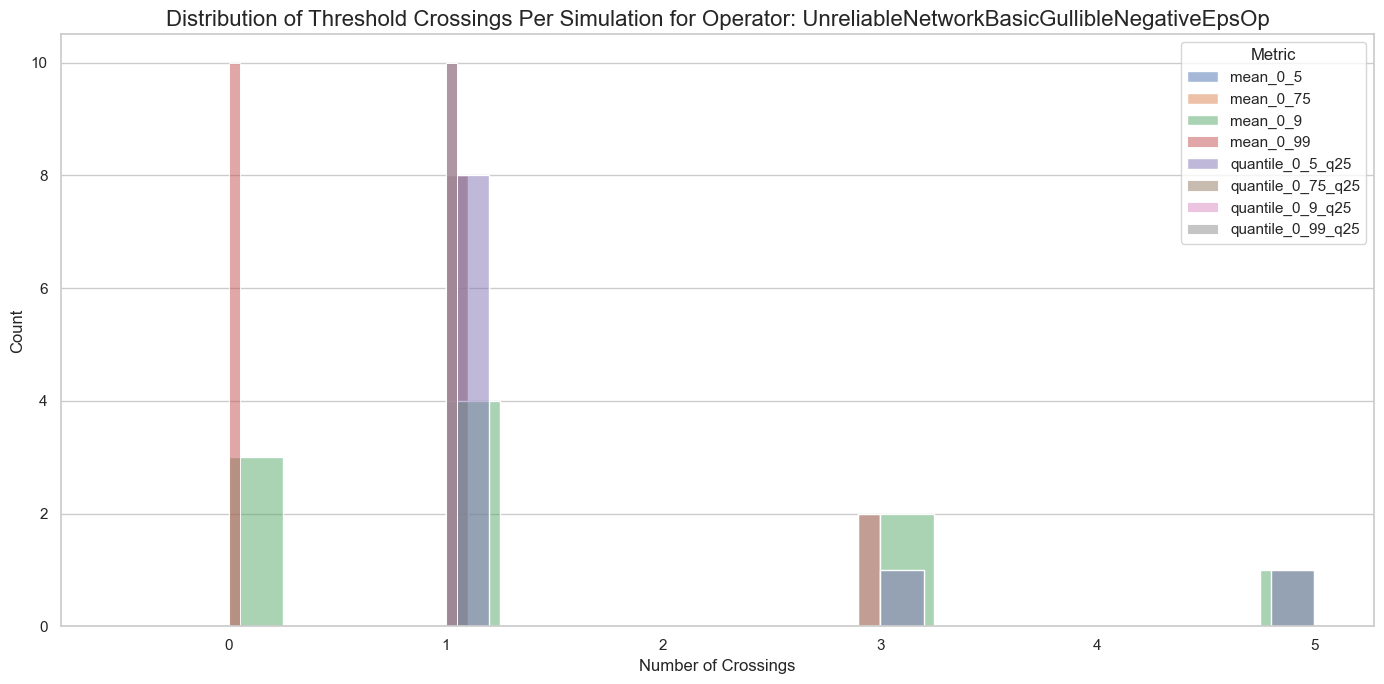

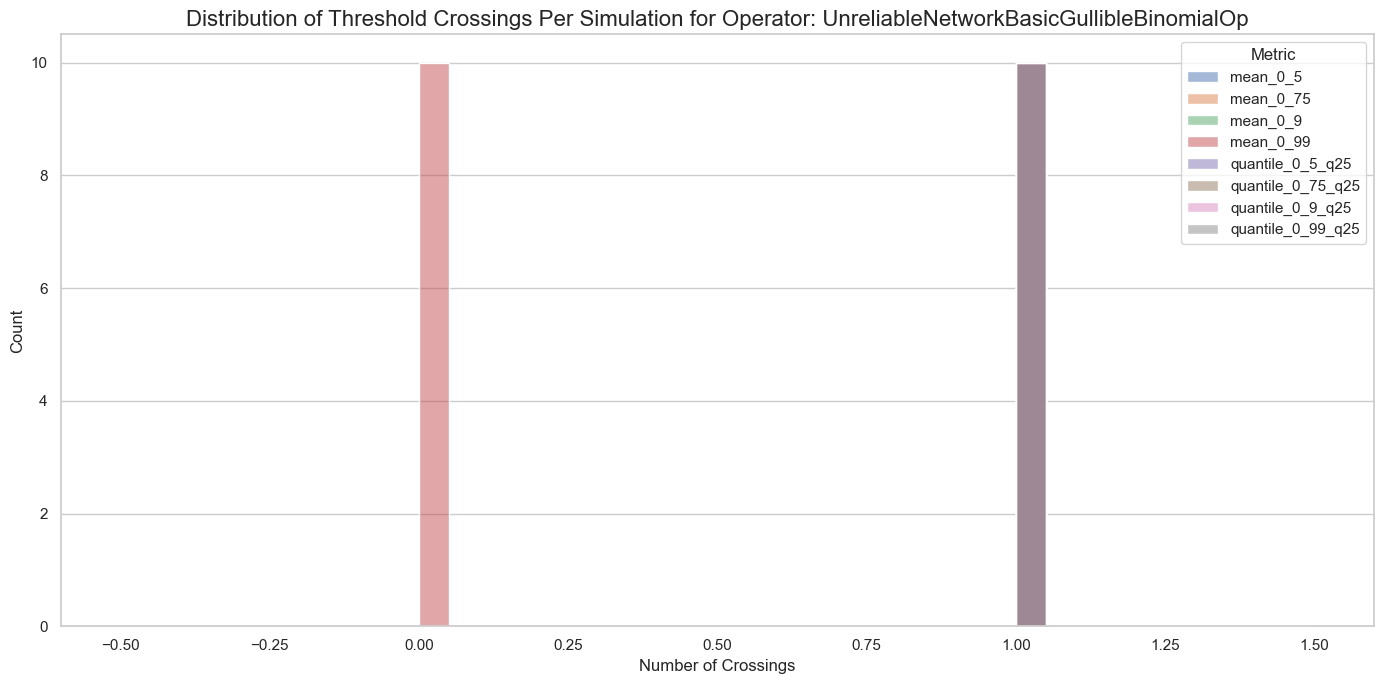

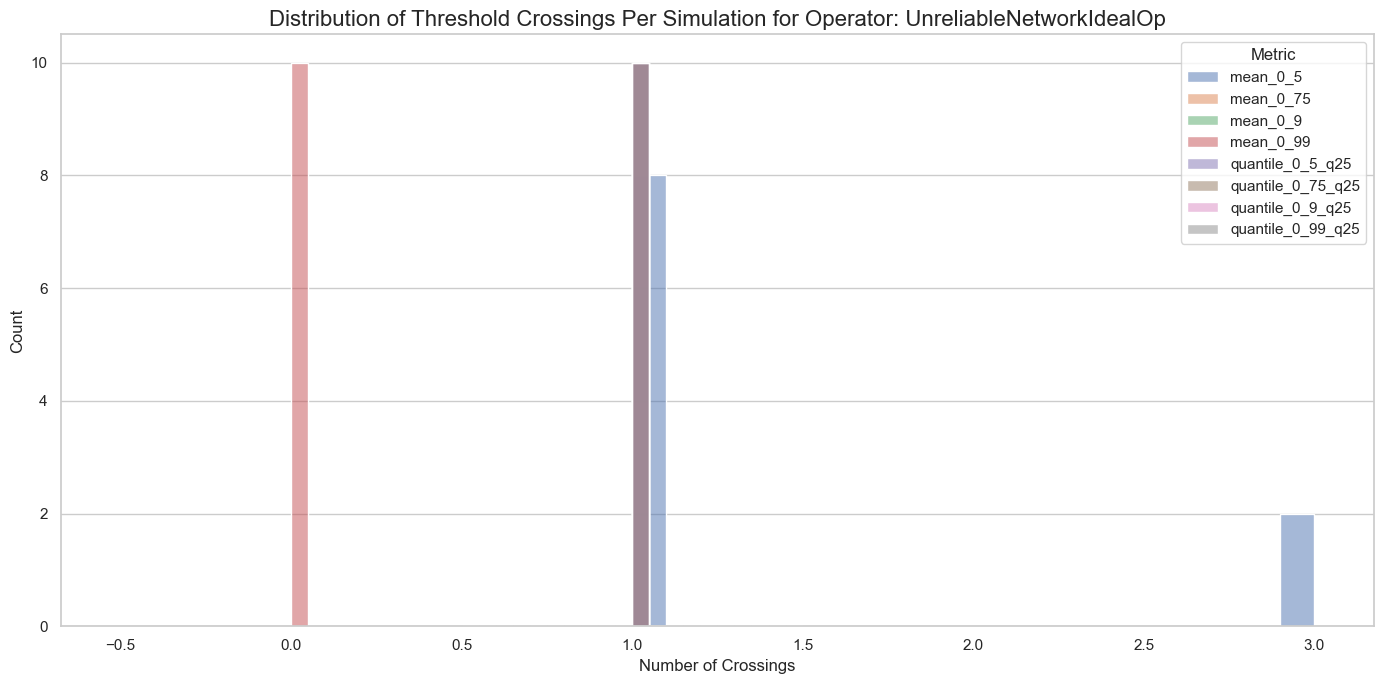

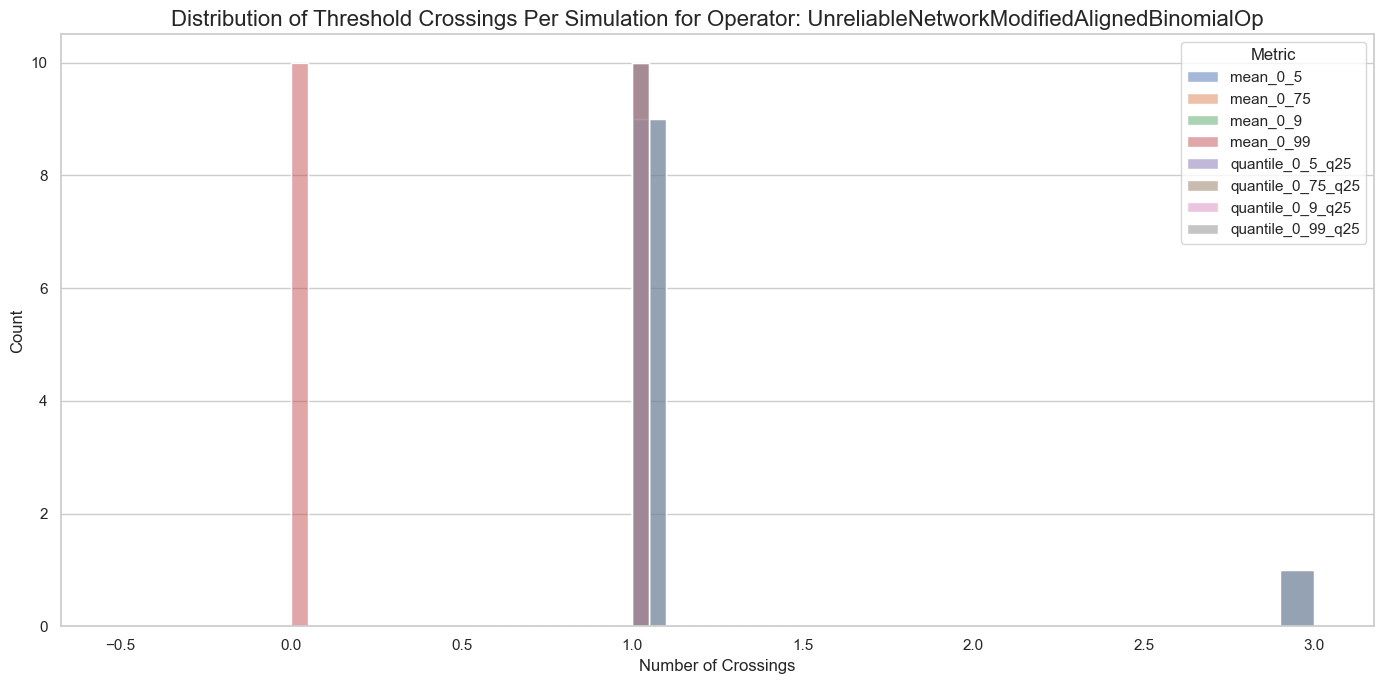

In [23]:
# (c) Distribution of Number of Threshold Crossings Per Simulation by Operator
for op in operators:
    op_data = x.dataframe[x.dataframe["op"] == op]
    plt.figure(figsize=(14, 7))
    for metric in metrics:
        crossing_col = f"{metric}_crossings"
        sns.histplot(data=op_data, x=crossing_col, label=metric, bins=20, alpha=0.5)
    plt.title(f"Distribution of Threshold Crossings Per Simulation for Operator: {op}", fontsize=16)
    plt.xlabel("Number of Crossings", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Metric")
    plt.grid(axis='x', visible=False) 
    plt.tight_layout()
    plt.savefig(f"images/crossings_distribution_{op}.png", format="png", dpi=300, bbox_inches="tight")
    plt.savefig(f"images/crossings_distribution_{op}.svg", format="svg", bbox_inches="tight")
    plt.show()